# Test Filtering

This script has test cases to help you test `my_imfilter()`, which you will write. You should verify that you get reasonable output here before using your filtering to construct a hybrid image in `proj1.m`. The outputs are all saved and you can include them in your writeup. You can add calls to OpenCV's `filter2D()` if you want to check that `my_imfilter()` is doing something similar.

## Setup

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib notebook
from utils import load_image, save_image
from student_code import my_imfilter
import time
test_image = load_image('../data/cat.bmp')
test_image = cv2.resize(test_image, (0, 0), fx=0.7, fy=0.7)

In [2]:
filter = np.asarray([[0, 0, 0], [0, 1, 0], [0, 0, 0]])

In [3]:
image = test_image
[h,w,c] = image.shape
[m,n] =filter.shape

In [4]:
t =time.time()
padded  = np.zeros((h+m-1,w+n-1,c))
for i in range(h):
    for j in range(w):
        for k in range(c):
            padded[int(i+(m-1)/2),int(j+(n-1)/2),k]= image[i,j,k]
print('For loop based padding takes', time.time()-t)

0.21368098258972168


In [10]:
t= time.time()
padded_image = np.zeros((h+m-1,w+n-1,c))
padded_image[m-2:-1,n-2:-1]=image
print('array assignment takes %s seconds' %str(time.time()-t))

array assignment takes 0.002085447311401367 seconds


In [9]:
t= time.time()
padded = np.pad(image,((int((m-1)/2),int((m-1)/2)),(int((n-1)/2),int((n-1)/2)),(0,0)))
print('np.pad takes %s seconds' %str(time.time()-t))

np.pad takes 0.0010509490966796875 seconds


In [5]:
t= time.time()
out_image1  = np.zeros_like(test_image)
for i in range(h):
    for j in range(w):
        for k in range(c):
            for a in range(m):
                for b in range(n):
                    out_image1[i,j,k] = out_image1[i,j,k] + padded[i+a,j+b,k]*filter[a,b]
print('Convolution time for Brute Force algorithem is %s seconds'  % str(time.time()-t))

Convolution time for Brute Force algorithem is 5.60330867767334 seconds


In [6]:
t= time.time()
filter = np.flipud(np.fliplr(filter))
    # convolution output
out_image  = np.zeros_like(image)
# Loop over every pixel of the image
for x in range(h):
    for y in range(w):
        for i in range(c):
            # element-wise multiplication of the kernel and the image
            out_image[x, y,i] = (np.multiply(filter,padded[x: x+n, y: y+m,i])).sum()
        
print('Convolution time for Revise version of algorithem is %s seconds'  % str(time.time()-t))

Convolution time for Revise version of algorithem is 0.9011468887329102 seconds


In [73]:
name= 'submarine'

In [74]:
test_image = load_image('../data/'+name+'.bmp')

## Identity filter
This filter should do nothing regardless of the padding method you use.

consumed time is using np.pad is  0.0011081695556640625
Convolution time for Revise version of algorithem is 1.8431298732757568 seconds


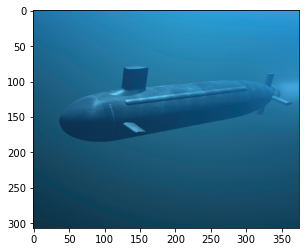

In [75]:
identity_filter = np.asarray([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
identity_image = my_imfilter(test_image, identity_filter)
plt.imshow(identity_image)
done = save_image('../results/identity_image_'+name+'.jpg', identity_image)

## Small blur with a box filter
This filter should remove some high frequencies.

consumed time is using np.pad is  0.0006809234619140625
Convolution time for Revise version of algorithem is 1.6218459606170654 seconds


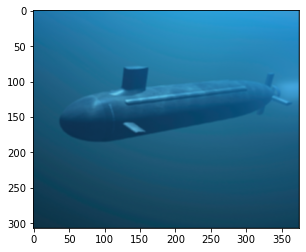

In [76]:
blur_filter = np.ones((3, 3))
blur_filter /= np.sum(blur_filter)  # making the filter sum to 1
blur_image = my_imfilter(test_image, blur_filter)
plt.imshow(blur_image)
done = save_image('../results/blur_image_'+name+'.jpg', blur_image)

## Large blur
This blur would be slow to do directly, so we instead use the fact that Gaussian blurs are separable and blur sequentially in each direction.

consumed time is using np.pad is  0.001352071762084961
Convolution time for Revise version of algorithem is 2.2914087772369385 seconds
consumed time is using np.pad is  0.0004673004150390625
Convolution time for Revise version of algorithem is 2.1656131744384766 seconds


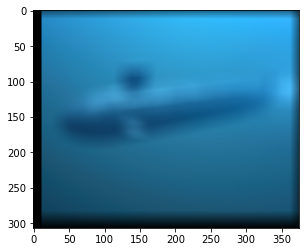

In [77]:
large_1d_blur_filter = cv2.getGaussianKernel(ksize=25, sigma=10)
large_blur_image = my_imfilter(test_image, large_1d_blur_filter)
# notice the T operator which transposes the filter
large_blur_image = my_imfilter(large_blur_image, large_1d_blur_filter.T)
plt.imshow((large_blur_image/large_blur_image.max()))
done = save_image('../results/large_blur_image_'+name+'.jpg', (large_blur_image/large_blur_image.max()))

If you want to see how slow this would be to do naively, try out this equivalent operation:

In [78]:
import time
large_blur_filter = np.dot(large_1d_blur_filter, large_1d_blur_filter.T)
t = time.time()
large_blur_image = my_imfilter(test_image, large_blur_filter);
t = time.time() - t
print('{:f} seconds'.format(t))

consumed time is using np.pad is  0.0008039474487304688
Convolution time for Revise version of algorithem is 2.223569393157959 seconds
2.224850 seconds


## Oriented filter (Sobel operator)

consumed time is using np.pad is  0.0006396770477294922
Convolution time for Revise version of algorithem is 1.5515618324279785 seconds


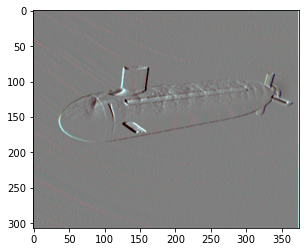

In [79]:
sobel_filter = np.asarray([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # should respond to horizontal gradients
sobel_image = my_imfilter(test_image, sobel_filter)

# 0.5 added because the output image is centered around zero otherwise and mostly black
sobel_image = np.clip(sobel_image+0.5, 0.0, 1.0)
plt.imshow(sobel_image)
done = save_image('../results/sobel_image_'+name+'.jpg', sobel_image)

## High pass filter (discrete Laplacian)

consumed time is using np.pad is  0.0008413791656494141
Convolution time for Revise version of algorithem is 1.5319256782531738 seconds


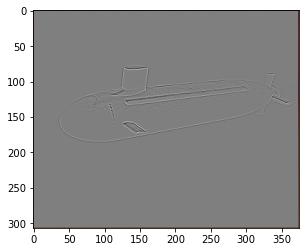

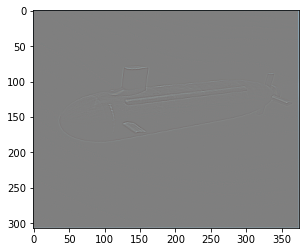

In [80]:
laplacian_filter = np.asarray([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
laplacian_image = my_imfilter(test_image, laplacian_filter)

# added because the output image is centered around zero otherwise and mostly black
laplacian_image = np.clip(laplacian_image+0.5, 0.0, 1.0)
plt.figure(); plt.imshow(laplacian_image)
done = save_image('../results/laplacian_image_'+name+'.jpg', laplacian_image)

# High pass "filter" alternative
high_pass_image = test_image - blur_image
high_pass_image = np.clip(high_pass_image+0.5, 0.0, 1.0)
plt.figure(); plt.imshow(high_pass_image)
done = save_image('../results/high_pass_image_'+name+'.jpg', high_pass_image)